## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import sem

# Create paths to data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

combined_df = pd.merge(mouse_df, study_df, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_duplicates = combined_df[combined_df['Mouse ID'] == 'g989'].index
clean_df = combined_df.drop(index_duplicates)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_mean = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
summary_mean = summary_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})

summary_median = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
summary_median = summary_median.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

summary_variance = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
summary_variance = summary_variance.rename(columns={"Tumor Volume (mm3)": "Variance of Tumor Volume"})

summary_sem = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
summary_sem = summary_sem.rename(columns={"Tumor Volume (mm3)": "SEM of Tumor Volume"})

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge1 = pd.merge(summary_mean, summary_median, on="Drug Regimen")
merge2 = pd.merge(merge1, summary_variance, on="Drug Regimen")
merged_summary = pd.merge(merge2, summary_sem, on="Drug Regimen")

merged_summary

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'sem'])
agg_summary

Tumor Volume (mm3)                                
                           mean     median        var       sem
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  0.329346
Ceftamin              52.591172  51.776157  39.290177  0.469821
Infubinol             52.884795  51.820584  43.128684  0.492236
Ketapril              55.235638  53.698743  68.553577  0.603860
Naftisol              54.331565  52.509285  66.173479  0.596466
Placebo               54.033581  52.288934  61.168083  0.581331
Propriva              52.320930  50.446266  43.852013  0.544332
Ramicane              40.216745  40.673236  23.486704  0.320955
Stelasyn              54.233149  52.431737  59.450562  0.573111
Zoniferol             53.236507  51.818479  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

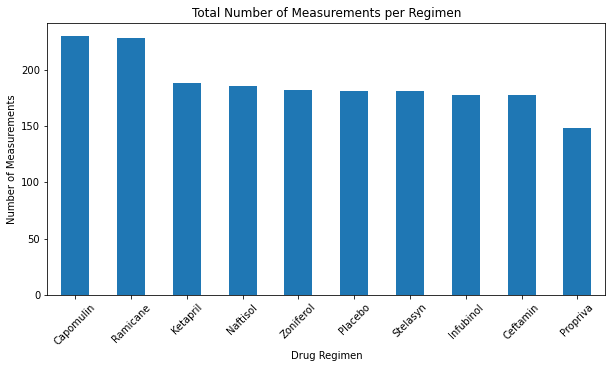

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Grab the value counts for the Drug Regimen column in the clean dataframe.
measure_count = clean_df["Drug Regimen"].value_counts()

# Create x and y axes using the drug names for the x axis and each drug's values for the y axis.
x_axis = measure_count.index
y_axis = measure_count.values

# Generate bar plot
measure_plot = measure_count.plot(x=x_axis, y=y_axis, kind='bar', figsize=(10,5), rot=45, title="Total Number of Measurements per Regimen")

measure_plot.set_xlabel("Drug Regimen")
measure_plot.set_ylabel("Number of Measurements")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

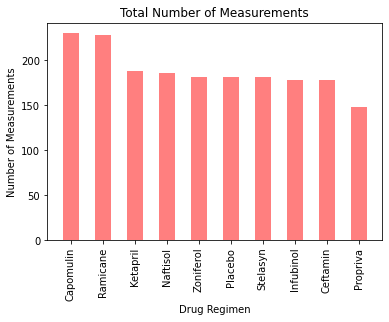

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Grab the value counts for the Drug Regimen column in the clean dataframe.
measure_count = clean_df["Drug Regimen"].value_counts()

# Create x and y axes using the drug names for the x axis and each drug's values for the y axis.
x_axis = measure_count.index
y_axis = measure_count.values

# Generate bar plot
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center", width=0.5)

# Create labels for the axes and a title. Rotate the xticks so they are vertical and easier to read.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements")
plt.xticks(rotation=90)

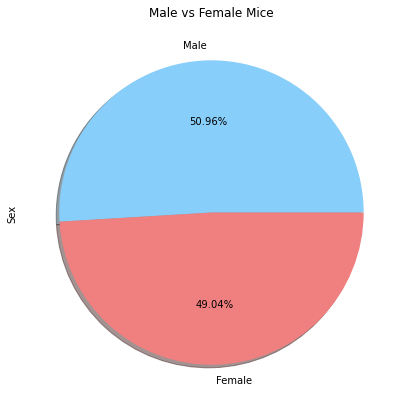

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Grab the value counts for the Sex column in the clean dataframe
gender_count = clean_df["Sex"].value_counts()

# Use those value counts to generate a pie plot
gender_count.plot.pie(figsize=(7,7), autopct='%1.2f%%', shadow=True, colors=['lightskyblue', 'lightcoral'], title="Male vs Female Mice")

Text(0.5, 1.0, 'Male vs Female Mice')

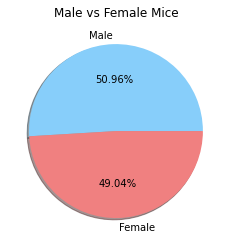

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Grab value counts for the Sex column in the clean dataframe
gender_count = clean_df["Sex"].value_counts()

# Use the values for the sizes of each piece in the pie and the indexes as their labels
sizes = gender_count.values
labels = gender_count.index

# Generate pie plot
plt.pie(sizes, labels=labels, colors=['lightskyblue', 'lightcoral'], autopct="%1.2f%%", shadow=True)
plt.title("Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df[["Mouse ID", "Timepoint"]].groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge = max_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"])

timepoint_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes. Add volumes to volume list.
capomulin = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

ramicane = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Ramicane", ["Tumor Volume (mm3)"]]

infubinol = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Infubinol", ["Tumor Volume (mm3)"]]

ceftamin = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == "Ceftamin", ["Tumor Volume (mm3)"]]

In [26]:
# Determine outliers using upper and lower bounds
cap_lowerq = np.quantile(capomulin, 0.25)
cap_upperq = np.quantile(capomulin, 0.75)
iqr = cap_upperq - cap_lowerq

cap_lower_bound = cap_lowerq - (1.5 * iqr)
cap_upper_bound = cap_upperq + (1.5 * iqr)

print(f"Values below {cap_lower_bound} are considered outliers")
print(f"Values above {cap_upper_bound} are considered outliers")

Values below 20.70456164999999 are considered outliers
Values above 51.83201549 are considered outliers


In [27]:
# Determine outliers using upper and lower bounds
ram_lowerq = np.quantile(ramicane, 0.25)
ram_upperq = np.quantile(ramicane, 0.75)
iqr = ram_upperq - ram_lowerq

ram_lower_bound = ram_lowerq - (1.5 * iqr)
ram_upper_bound = ram_upperq + (1.5 * iqr)

print(f"Values below {ram_lower_bound} are considered outliers")
print(f"Values above {ram_upper_bound} are considered outliers")

Values below 17.912664470000003 are considered outliers
Values above 54.30681135 are considered outliers


In [28]:
# Determine outliers using upper and lower bounds
inf_lowerq = np.quantile(infubinol, 0.25)
inf_upperq = np.quantile(infubinol, 0.75)
iqr = inf_upperq - inf_lowerq

inf_lower_bound = inf_lowerq - (1.5 * iqr)
inf_upper_bound = inf_upperq + (1.5 * iqr)

print(f"Values below {inf_lower_bound} are considered outliers")
print(f"Values above {inf_upper_bound} are considered outliers")

Values below 36.83290494999999 are considered outliers
Values above 82.74144559000001 are considered outliers


In [29]:
# Determine outliers using upper and lower bounds
cef_lowerq = np.quantile(ceftamin, 0.25)
cef_upperq = np.quantile(ceftamin, 0.75)
iqr = cef_upperq - cef_lowerq

cef_lower_bound = cef_lowerq - (1.5 * iqr)
cef_upper_bound = cef_upperq + (1.5 * iqr)

print(f"Values below {cef_lower_bound} are considered outliers")
print(f"Values above {cef_upper_bound} are considered outliers")

Values below 25.355449580000002 are considered outliers
Values above 87.66645829999999 are considered outliers


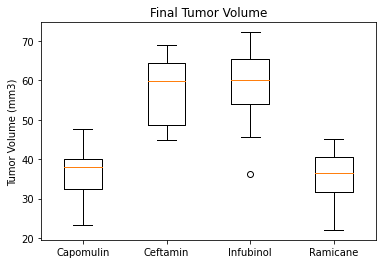

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot([capomulin, ceftamin, infubinol, ramicane], labels=treatments)


plt.show()

## Line and Scatter Plots

In [35]:
# Sort dataframe by Drug Regimen
capomulin_df = clean_df.sort_values("Drug Regimen")
# Show dataframe
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
347,v923,Capomulin,Female,19,21,30,40.752216,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
357,g316,Capomulin,Female,22,22,30,44.221480,2
356,g316,Capomulin,Female,22,22,25,46.809225,1
355,g316,Capomulin,Female,22,22,20,45.933322,1
...,...,...,...,...,...,...,...,...
1324,o926,Zoniferol,Male,15,29,40,59.903044,3
1323,o926,Zoniferol,Male,15,29,35,58.593993,3
1322,o926,Zoniferol,Male,15,29,30,56.917398,3
591,b313,Zoniferol,Male,12,27,15,49.188387,1


In [36]:
# Based off of the sorted dataframe, choose a random mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Mouse ID"] == "g316", ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse

,Timepoint,Tumor Volume (mm3)
351,0,45.000000
352,5,44.022752
353,10,44.502042
354,15,45.216743
355,20,45.933322
356,25,46.809225
357,30,44.221480
358,35,44.702833
359,40,45.565821
360,45,40.159220


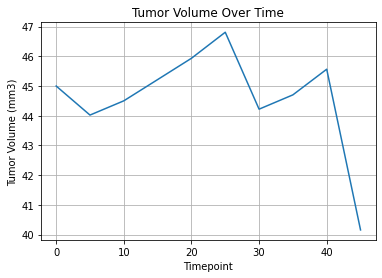

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create values for x and y axes
timepoints = capomulin_mouse["Timepoint"]
tumor_vol = capomulin_mouse["Tumor Volume (mm3)"]

# Plot line graph and format
plt.plot(timepoints, tumor_vol)
plt.grid()
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Tumor Volume Over Time")

plt.show()

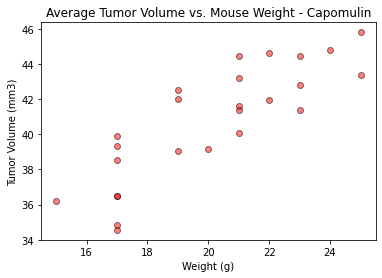

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

cap_avg = cap_data.groupby("Mouse ID").mean()

cap_weight = cap_avg["Weight (g)"]
cap_volume = cap_avg["Tumor Volume (mm3)"]

plt.scatter(cap_weight, cap_volume, marker="o", facecolors="red", edgecolors="black", alpha=0.5)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight - Capomulin")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
